In [2]:
from qbstyles import mpl_style
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid", palette="deep")

In [3]:
transitions = pd.read_csv("./transitions.csv")
transitions["cumulative_reward"] = transitions["reward"].cumsum(axis=0)
transitions.describe()


,t,warehouse_num,factory_stock,warehouse_stock_0,warehouse_stock_1,production_level,shippings_to_warehouses_0,shippings_to_warehouses_1,reward,cumulative_reward
count,50.00000,50.0,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,24.50000,2.0,0.90000,5.180000,5.280000,3.800000,1.900000,1.900000,124.420000,2862.180000
std,14.57738,0.0,1.94044,1.599617,1.525832,4.903144,2.451572,2.451572,234.334759,2002.628433
min,0.00000,2.0,0.00000,1.000000,2.000000,0.000000,0.000000,0.000000,-315.000000,-590.000000
25%,12.25000,2.0,0.00000,4.000000,4.000000,0.000000,0.000000,0.000000,-102.250000,1164.250000
50%,24.50000,2.0,0.00000,5.000000,5.000000,0.000000,0.000000,0.000000,219.500000,2685.500000
75%,36.75000,2.0,0.00000,6.000000,6.750000,10.000000,5.000000,5.000000,331.500000,4643.250000
max,49.00000,2.0,5.00000,8.000000,8.000000,10.000000,5.000000,5.000000,440.000000,6221.000000


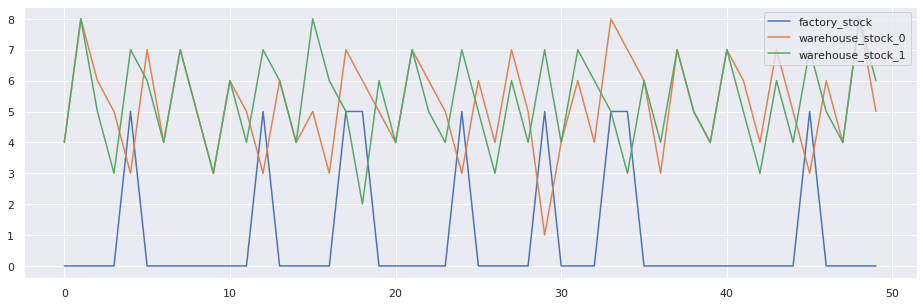

In [4]:
plt.figure(figsize=(16,5))
plt.plot(transitions["factory_stock"])
plt.plot(transitions["warehouse_stock_0"])
plt.plot(transitions["warehouse_stock_1"])

plt.legend(["factory_stock", "warehouse_stock_0", "warehouse_stock_1"])


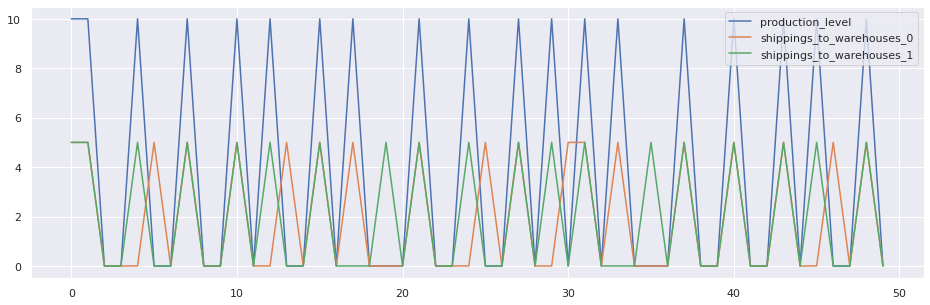

In [5]:
plt.figure(figsize=(16, 5))
plt.plot(transitions["production_level"])
plt.plot(transitions["shippings_to_warehouses_0"])
plt.plot(transitions["shippings_to_warehouses_1"])

plt.legend(["production_level", "shippings_to_warehouses_0",
           "shippings_to_warehouses_1"])


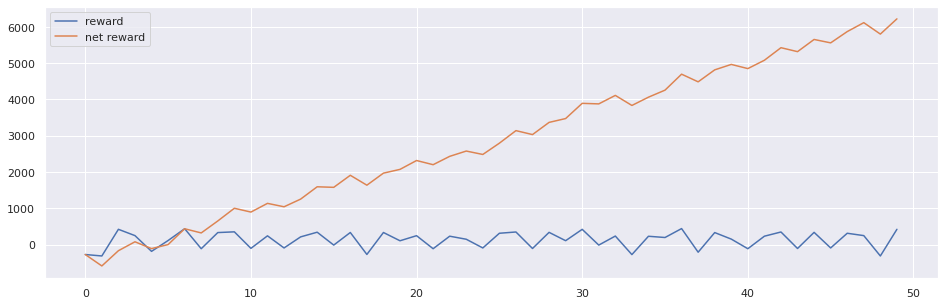

In [6]:
plt.figure(figsize=(16, 5))
plt.plot(transitions["reward"])
plt.plot(transitions["cumulative_reward"])
plt.legend(["reward", "net reward"])


In [7]:
demands = pd.read_csv("./demands.csv", names=['t', 'demand_0', 'demand_1'])
demands.describe()


,t,demand_0,demand_1
count,50.00000,50.000000,50.000000
mean,24.50000,1.800000,1.780000
std,14.57738,0.755929,0.545482
min,0.00000,1.000000,1.000000
25%,12.25000,1.000000,1.000000
50%,24.50000,2.000000,2.000000
75%,36.75000,2.000000,2.000000
max,49.00000,4.000000,3.000000


In [8]:
compiled = pd.merge(transitions, demands, on='t')
compiled.describe()

,t,warehouse_num,factory_stock,warehouse_stock_0,warehouse_stock_1,production_level,shippings_to_warehouses_0,shippings_to_warehouses_1,reward,cumulative_reward,demand_0,demand_1
count,50.00000,50.0,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,24.50000,2.0,0.90000,5.180000,5.280000,3.800000,1.900000,1.900000,124.420000,2862.180000,1.800000,1.780000
std,14.57738,0.0,1.94044,1.599617,1.525832,4.903144,2.451572,2.451572,234.334759,2002.628433,0.755929,0.545482
min,0.00000,2.0,0.00000,1.000000,2.000000,0.000000,0.000000,0.000000,-315.000000,-590.000000,1.000000,1.000000
25%,12.25000,2.0,0.00000,4.000000,4.000000,0.000000,0.000000,0.000000,-102.250000,1164.250000,1.000000,1.000000
50%,24.50000,2.0,0.00000,5.000000,5.000000,0.000000,0.000000,0.000000,219.500000,2685.500000,2.000000,2.000000
75%,36.75000,2.0,0.00000,6.000000,6.750000,10.000000,5.000000,5.000000,331.500000,4643.250000,2.000000,2.000000
max,49.00000,2.0,5.00000,8.000000,8.000000,10.000000,5.000000,5.000000,440.000000,6221.000000,4.000000,3.000000


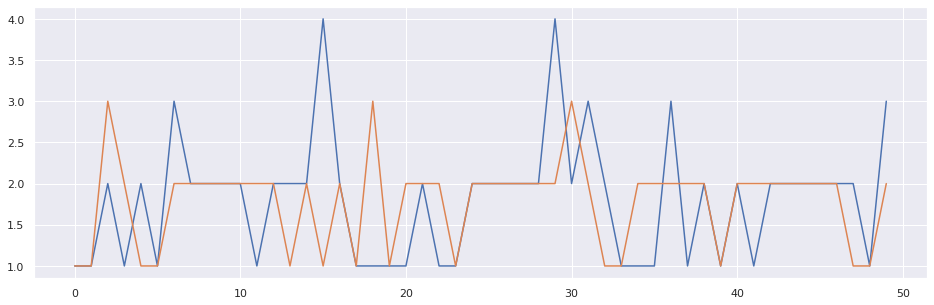

In [9]:
plt.figure(figsize=(16,5))
plt.plot(demands["demand_0"])
plt.plot(demands["demand_1"])